In [1]:
%matplotlib inline
import cupy as cp
import cudf
import pickle
import pandas as pd
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
from utils import visualize_data, visualize_data_cuml, visualize_data_spark_adjusted
sns.set_palette("muted")

# Visualize Data From cuML + Dask

### Visualize Strong Scaling in cuML + Dask based on the number of GPUs.

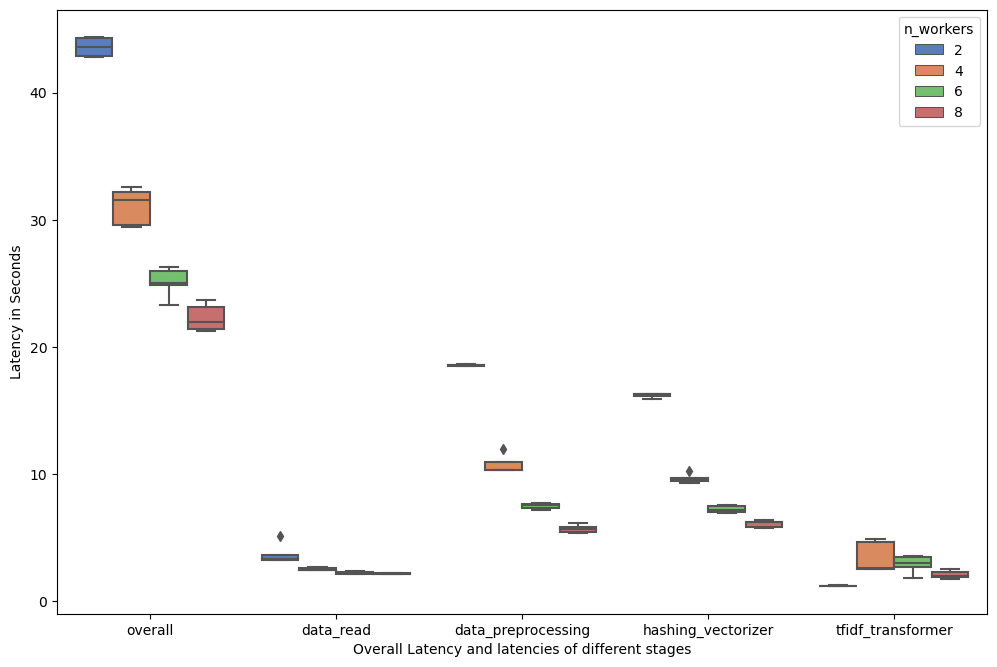

overall                 data_read                  \
                mean       std count      mean       std count   
n_workers                                                        
2          43.601849  0.733715     5  3.676809  0.804110     5   
4          31.045885  1.455146     5  2.499536  0.111701     5   
6          25.068612  1.169822     5  2.190867  0.093679     5   
8          22.267771  1.096895     5  2.142816  0.053349     5   

          hashing_vectorizer                 tfidf_transformer  ...        \
                        mean       std count              mean  ... count   
n_workers                                                       ...         
2                  16.154609  0.174656     5          1.182243  ...     5   
4                   9.627595  0.377252     5          3.407960  ...     5   
6                   7.196249  0.276245     5          2.872289  ...     5   
8                   6.060744  0.278152     5          2.058753  ...     5   

          data_preprocessing                     nrows            sample_run  \
                        mean       std count      mean  std count       mean   
n_workers                                                                      
2                  18.526173  0.046918     5  20725971  0.0     5          2   
4                  10.764249  0.710378     5  20725971  0.0     5          2   
6                   7.466962  0.227338     5  20725971  0.0     5          2   
8                   5.670149  0.347658     5  20725971  0.0     5          2   

                           
                std count  
n_workers                  
2          1.581139     5  
4          1.581139     5  
6          1.581139     5  
8          1.581139     5  

[4 rows x 21 columns]

In [2]:
data_cuML, melt_data_cuML = visualize_data_cuml("./results/result_poc_nlp_dask_Books_persist.csv")
groupy_cuML = data_cuML.groupby("n_workers").agg(['mean', 'std', 'count'])
groupy_cuML

In [3]:
data_cuML

,overall,data_read,hashing_vectorizer,tfidf_transformer,data_preprocessing,nrows,n_workers,sample_run
0,44.365918,5.089514,16.293625,1.153945,18.540179,20725971,2,0
1,42.820689,3.181780,16.099082,1.194649,18.522295,20725971,2,1
2,43.618034,3.577633,16.244208,1.166985,18.595844,20725971,2,2
3,44.294788,3.287221,16.263774,1.217355,18.502949,20725971,2,3
4,42.909816,3.247898,15.872358,1.178283,18.469599,20725971,2,4
5,29.454383,2.641332,9.648912,2.511277,10.322448,20725971,4,0
6,32.528956,2.597420,10.239334,2.550336,11.947546,20725971,4,1
7,32.149037,2.394930,9.417120,4.860108,10.916927,20725971,4,2
8,29.542108,2.440835,9.590962,2.505987,10.323725,20725971,4,3
9,31.554941,2.423162,9.241648,4.612093,10.310600,20725971,4,4


# Visualize Data from Spark

## Data with persisting intermediate stages which will give us the latency of intermediate stages. 

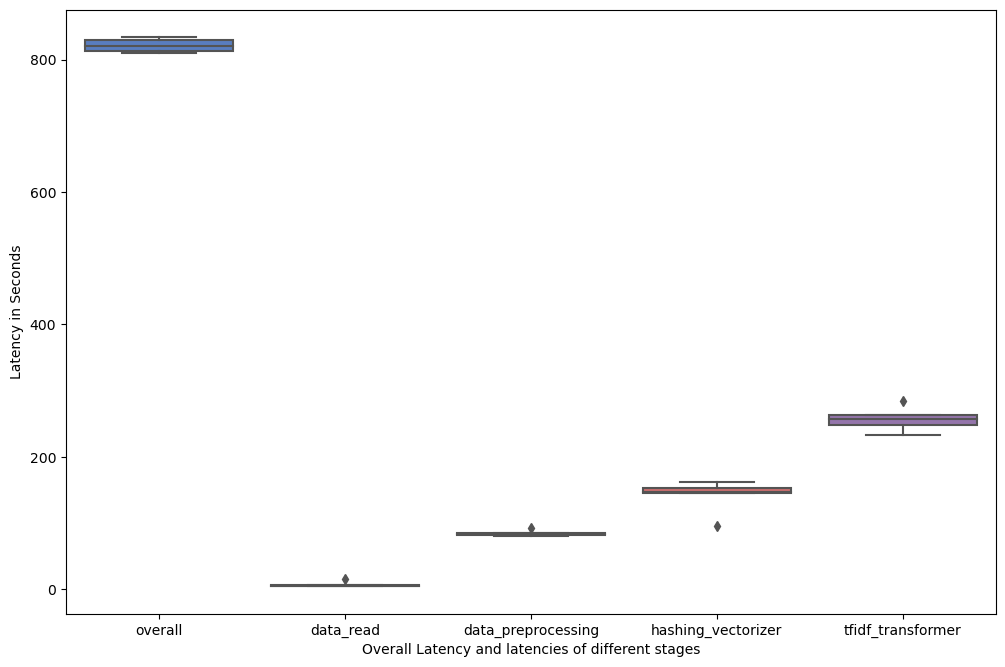

overall                  data_read                  \
                 mean        std count      mean       std count   
n_workers                                                          
1          821.346881  10.271341     5  7.323997  4.444873     5   

          hashing_vectorizer                  tfid_transformer  ...  \
                        mean        std count             mean  ...   
n_workers                                                       ...   
1                 140.562517  26.048167     5                0  ...   

          data_preprocessing     nrows            tfidf_transformer            \
                       count      mean  std count              mean       std   
n_workers                                                                       
1                          5  20725971  0.0     5        257.355478  19.28817   

                sample_run                  
          count       mean       std count  
n_workers                                   
1             5          2  1.581139     5  

[1 rows x 24 columns]

In [4]:
data_spark_persist, melt_data_spark_persist = visualize_data_spark_adjusted("./results/result_poc_nlp_spark_Books_persist.csv")
groupy_spark_persist = data_spark_persist.groupby("n_workers").agg(['mean', 'std', 'count'])
groupy_spark_persist

In [5]:
data_spark_persist

,overall,data_read,hashing_vectorizer,tfid_transformer,data_preprocessing,nrows,tfidf_transformer,n_workers,sample_run
0,813.567749,15.239853,95.383197,0,92.254896,20725971,285.076923,1,0
1,809.337088,5.969576,147.581391,0,80.536814,20725971,248.685240,1,1
2,833.992703,4.935677,153.299537,0,83.471319,20725971,257.236600,1,2
3,828.907353,5.483240,144.962025,0,84.636143,20725971,263.141393,1,3
4,820.929514,4.991638,161.586432,0,81.717434,20725971,232.637235,1,4


## Data without persist, which will give us the end to end timing in real world scenarios.

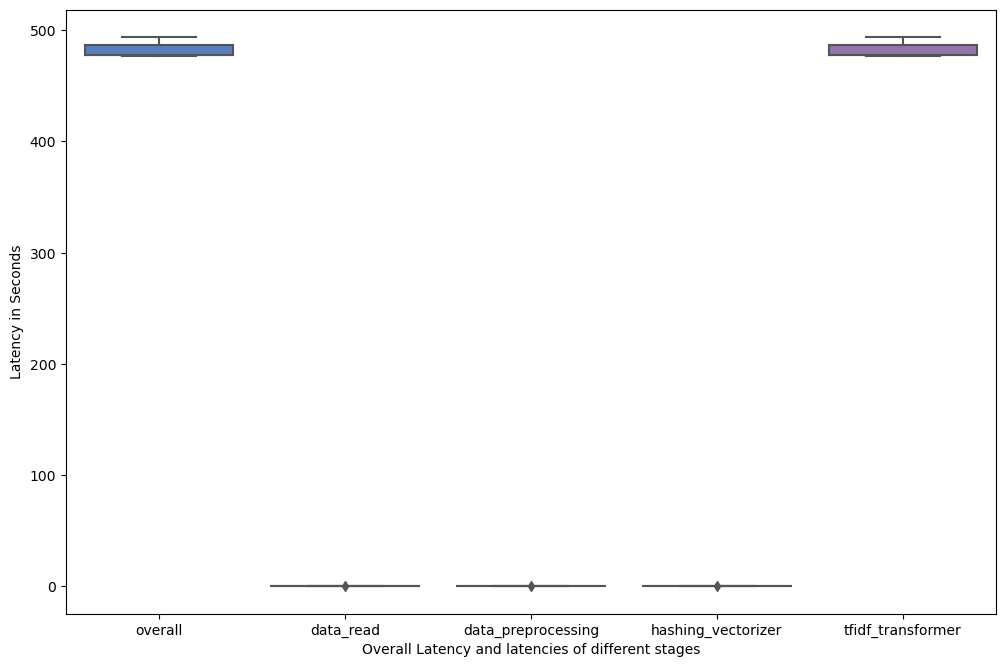

overall                data_read                 \
                 mean      std count      mean      std count   
n_workers                                                       
1          482.556675  7.49993     5  0.050778  0.00059     5   

          hashing_vectorizer                tfid_transformer  ...  \
                        mean      std count             mean  ...   
n_workers                                                     ...   
1                  -0.080929  0.00566     5                0  ...   

          data_preprocessing     nrows            tfidf_transformer            \
                       count      mean  std count              mean       std   
n_workers                                                                       
1                          5  20725971  0.0     5        482.389669  7.491129   

                sample_run                  
          count       mean       std count  
n_workers                                   
1             5          2  1.581139     5  

[1 rows x 24 columns]

In [6]:
data_spark_nonpersist, melt_data_spark_nonpersist = visualize_data_spark_adjusted("./results/result_poc_nlp_spark_Books_nonpersist.csv")
groupy_spark_nonpersist = data_spark_nonpersist.groupby("n_workers").agg(['mean', 'std', 'count'])
groupy_spark_nonpersist

# Baseline Scikit-Learn Performance

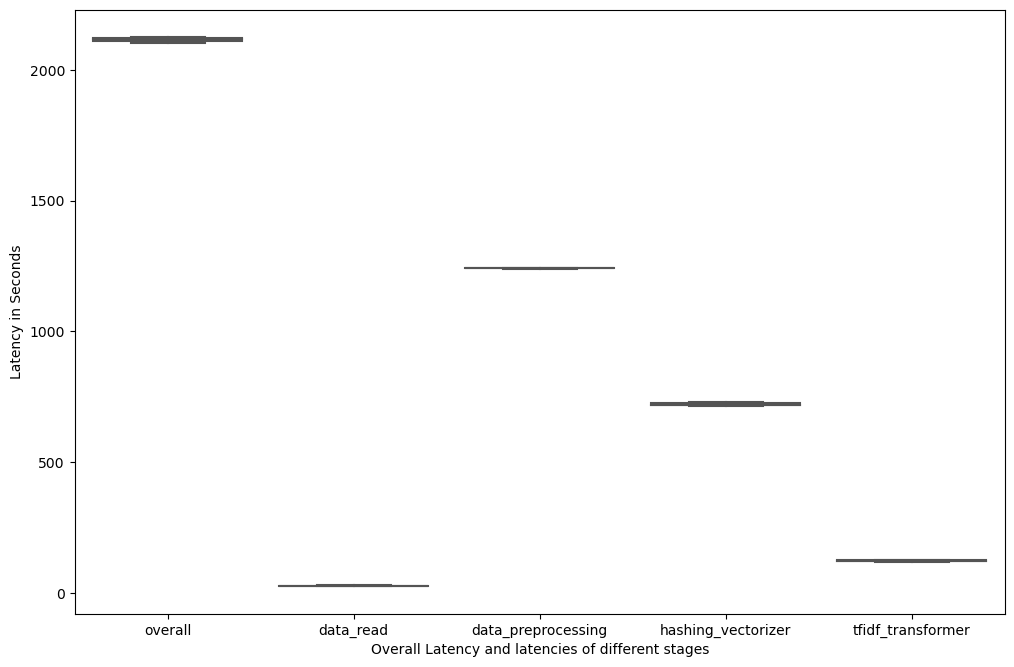

overall                   data_read                  \
                  mean        std count       mean       std count   
n_workers                                                            
1          2115.233674  11.366341     3  27.855721  1.564252     3   

          hashing_vectorizer                 tfid_transformer  ...  \
                        mean       std count             mean  ...   
n_workers                                                      ...   
1                  722.18887  8.655928     3                0  ...   

          data_preprocessing     nrows            tfidf_transformer            \
                       count      mean  std count              mean       std   
n_workers                                                                       
1                          3  20725971  0.0     3        123.780726  3.381532   

                sample_run             
          count       mean  std count  
n_workers                              
1             3          1  1.0     3  

[1 rows x 24 columns]

In [7]:
data_sklearn, melt_data_sklearn = visualize_data("./results/result_poc_nlp_sklearn_Books.csv") # we can use the cuML visualized function since all captured fields are same
groupy_sklearn = data_sklearn.groupby("n_workers").agg(['mean', 'std', 'count'])
groupy_sklearn

In [8]:
groupy_sklearn

overall                   data_read                  \
                  mean        std count       mean       std count   
n_workers                                                            
1          2115.233674  11.366341     3  27.855721  1.564252     3   

          hashing_vectorizer                 tfid_transformer  ...  \
                        mean       std count             mean  ...   
n_workers                                                      ...   
1                  722.18887  8.655928     3                0  ...   

          data_preprocessing     nrows            tfidf_transformer            \
                       count      mean  std count              mean       std   
n_workers                                                                       
1                          3  20725971  0.0     3        123.780726  3.381532   

                sample_run             
          count       mean  std count  
n_workers                              
1             3          1  1.0     3  

[1 rows x 24 columns]

# Comparison of End to End times

## Calculations for the graph

In [9]:
n_gpus_for_benchmark = 6
melt_data_cuML["Experiment_Class"]=f"cuML + Dask + {n_gpus_for_benchmark}GPUs"
melt_data_sklearn["Experiment_Class"] = "Scikit-Learn"
melt_data_spark_persist["Experiment_Class"]="Apache Spark"
melt_data_spark_nonpersist["Experiment_Class"] = "Apache Spark"
melt_data_spark_persist[melt_data_spark_persist.latency=="overall"] = melt_data_spark_nonpersist[melt_data_spark_nonpersist.latency=="overall"]
data = pd.concat([melt_data_sklearn, melt_data_spark_persist, melt_data_cuML[melt_data_cuML.n_workers==6]])

## Plot the latencies.

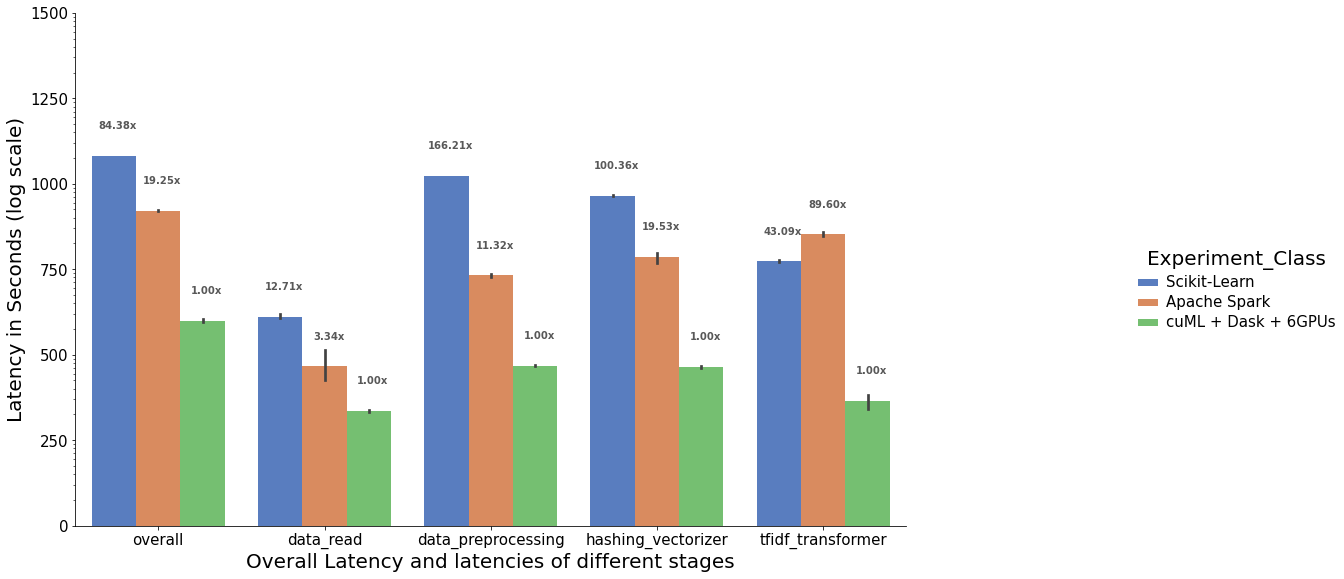

In [10]:
# with some help from https://stackoverflow.com/a/31754317
g = sns.catplot(x='latency', y='value', hue='Experiment_Class', data=data, kind='bar')
bar_order = product(["Scikit-Learn", "Apache Spark", f"cuML + Dask + {n_gpus_for_benchmark}GPUs"], ["overall", "data_read", "data_preprocessing", "hashing_vectorizer", "tfidf_transformer"], )
spots = zip(g.ax.patches, bar_order)
for spot in spots:
    corresponding_cuml_numbers = data[(data.Experiment_Class==f"cuML + Dask + {n_gpus_for_benchmark}GPUs") & (data.latency==spot[1][1])]
    mean_std = corresponding_cuml_numbers.value.mean()# + corresponding_cuml_numbers.value.std() 
    g.ax.annotate(f"{spot[0].get_height()/mean_std:.2f}x", (spot[0].get_x() + spot[0].get_width() / 2., spot[0].get_height()), ha='center', va='center', xytext=(4, 30), textcoords='offset points', fontsize=10, weight='bold', color="#585858")
g.fig.set_size_inches(20,8)
g.set(yscale="log")
g.set_xlabels("Overall Latency and latencies of different stages",fontsize=20)
g.set_ylabels("Latency in Seconds (log scale)",fontsize=20)
plt.setp(g._legend.get_title(), fontsize=20)
plt.setp(g._legend.texts, size=15)
g.set_xticklabels(size=15)
g.set_yticklabels(size=15)